In [2]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import statistics as st
import seaborn as sns
import datetime 

In [8]:
bikes = pd.read_csv("/Users/pablosoriano/Documents/Data Science/Code Academy/projects/project_3_ capitalbikeshare/CBS_2021-2023_Full.csv", low_memory=False)
# bikes3 = pd.read_csv("/Users/pablosoriano/Documents/Data Science/Code Academy/projects/project_3_ capitalbikeshare/bikes_clean.csv", low_memory=False)

# Data Wrangling

In [9]:
bikes.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,5CB9DFCECF79AF84,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,629E059504606547,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,E74069873161EE33,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,91F95E512CABC46A,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,DA46A05139C0EA2F,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member
5,0FD3B4B2152425C3,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,NaN,Georgia Ave & Kennedy St NW,31415.0,38.930000,-77.030000,38.956738,-77.027940,casual
6,0535306B61EF92F9,classic_bike,2021-01-01 00:19:06,2021-01-01 00:36:28,Bladensburg Rd & Benning Rd NE,31617.0,Good Hope Rd & MLK Ave SE,31802.0,38.900413,-76.982872,38.867373,-76.988039,casual
7,78894BDABD9F21DD,electric_bike,2021-01-01 00:20:40,2021-01-01 00:35:36,Columbia Rd & Georgia Ave NW,31115.0,NaN,NaN,38.928081,-77.023768,38.900000,-77.020000,casual
8,CB36F43FA77E4A35,docked_bike,2021-01-01 00:21:19,2021-01-01 00:33:31,15th & F St NE,31632.0,1st & M St SE,31650.0,38.897195,-76.983575,38.876893,-77.006072,casual
9,874D92427D41BC30,classic_bike,2021-01-01 00:21:39,2021-01-01 00:31:07,14th & Otis Pl NW,31131.0,14th & R St NW,31202.0,38.934405,-77.032687,38.913046,-77.032008,member


In [10]:
bikes.shape

(10693997, 13)

In [ ]:
bikes.info()
sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 1.0+ GB


In [131]:
# Convert categorical columns to category type for memory efficiency
bikes2= bikes.copy()
bikes2["rideable_type"] = bikes2["rideable_type"].astype("category")
bikes2["start_station_name"] = bikes2["start_station_name"].astype("category")
bikes2["end_station_name"] = bikes2["end_station_name"].astype("category")
bikes2["member_casual"] = bikes2["member_casual"].astype("category")

# Regenerate the entire ride_id column with sequential integers and convert it
# to a memory-efficient data type (uint32)
bikes2['ride_id'] = pd.Series(range(1, len(bikes2) + 1), dtype='uint32')

In [132]:
bikes2["started_at"]=pd.to_datetime(bikes["started_at"])
bikes2["ended_at"]=pd.to_datetime(bikes["ended_at"])
bikes2.info()
bikes2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10693997 entries, 0 to 10693996
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             uint32        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  category      
 5   start_station_id    object        
 6   end_station_name    category      
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(4), datetime64[ns](2), float64(4), object(2), uint32(1)
memory usage: 754.8+ MB


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646.0,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015.0,38.880440,-77.025236,38.894600,-77.072305,member
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111.0,NaN,NaN,38.917193,-77.025894,38.960000,-77.020000,casual
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214.0,14th & Belmont St NW,31119.0,38.912138,-77.038568,38.920870,-77.031691,member
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926.0,Wilson Blvd. & N. Vermont St.,31926.0,38.879477,-77.114563,38.879477,-77.114563,member
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651.0,14th & Newton St NW,31649.0,38.931322,-77.028247,38.931991,-77.032956,member


## handling missing / incomplete data

In [14]:
# missing values
bikes2.isna().any()
bikes2.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id      742776
end_station_name      811282
end_station_id        811282
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
dtype: int64

determine the latitude/long coordinates for each station
do a for loop creating a range of max and min, latitude and longitud, for each station. 
Use this range to input missing values.

In [15]:
# bikes[bikes["end_station_id"]==31015.0]
# # transform coordinates into float
# bikes2= bikes.copy()

# # bikes2.astype({"start_lat": float})
# bikes2.astype({"start_lat": float, "start_lng": float, "end_lat":float, "end_lng":float})

## formatting

In [133]:
bikes2["start_station_id"]=bikes2["start_station_id"].str.replace(".0","")
bikes2["end_station_id"]=bikes2["end_station_id"].str.replace(".0","")

## unique values

In [ ]:
# unique values before formatting
# Filter the DataFrame for object columns
non_numeric = bikes.select_dtypes("object")

# Loop through columns
for x in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {x} column: ", non_numeric[x].nunique())

# Filter the DataFrame for object columns
non_numeric = bikes2.select_dtypes("object")

# Loop through columns
for x in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {x} column: ", non_numeric[x].nunique())

  ##NOTE - removing the '.0" at the end of station id reduced the amount of unique values by 600


In [114]:
bikes2.isna().any()
bikes2.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    742776
start_station_id        1193
end_station_name      811282
end_station_id          1452
start_lat                  2
start_lng                  2
end_lat                16765
end_lng                16765
member_casual              0
start_lat_filled           0
start_lng_filled           0
grid_cell                  0
end_lat_filled             0
end_lng_filled             0
grid_cell_end              0
dtype: int64

## Dealing with missing values

In [19]:
# # Determine a range of latitude and longitud (max and min) for each station
# coordinate_columns = bikes2[["start_lat","start_lng","end_lat","end_lng"]]

# # bikes2[bikes2["start_station_name"]=="10th & U St NW"].nlargest(1, "start_lat")
# print("max_latitude: ", bikes2[bikes2["start_station_name"]=="10th & U St NW"].nlargest(1,"start_lat")["start_lat"])
# print("min_latitude: ",bikes2[bikes2["start_station_name"]=="10th & U St NW"].nsmallest(1,"start_lat")["start_lat"])

# # filter = bikes2["start_station_name"]=="10th & U St NW"
# # filter

## Step 1: Create a Station Boundary Lookup
Create a DataFrame containing the station IDs along with their latitude and longitude ranges.





In [20]:
# station_bounds = bikes2.groupby("start_station_id").agg({
#     "start_lat": ["min", "max"],
#     "start_lng": ["min", "max"]
# }).reset_index()

# # Flatten multi-level column names
# station_bounds.columns = ["start_station_id", "min_lat", "max_lat", "min_lng", "max_lng"]

In [21]:
# station_bounds["centroid_lat"] = (station_bounds["min_lat"] + station_bounds["max_lat"]) / 2
# station_bounds["centroid_lng"] = (station_bounds["min_lng"] + station_bounds["max_lng"]) / 2
# station_bounds

## Step 2: Define a Function to Match Coordinates
Create a function that takes the latitude and longitude of a row and finds the start_station_id that falls within the corresponding range.

how is it possible that there are more unique values in the id columns than in the name columns? they should be the same. one possible explanation is that one station_name has multiple station_id's

In [22]:
# def find_station_id(lat, lng, station_bounds):
#     # Filter the station bounds for matches
#     matches = station_bounds[
#         (station_bounds["min_lat"] <= lat) & 
#         (station_bounds["max_lat"] >= lat) & 
#         (station_bounds["min_lng"] <= lng) & 
#         (station_bounds["max_lng"] >= lng)]
#     print(f"Lat: {lat}, Lng: {lng}, Matches:\n{matches}")
    
#     # If exactly one match, return the station ID
#     if len(matches) == 1:
#         return matches["start_station_id"].iloc[0]
#     elif len(matches) > 1:
#         # Calculate distances to the centroid of each matching station
#         matches["distance"] = np.sqrt(
#             (matches["centroid_lat"] - lat) ** 2 + 
#             (matches["centroid_lng"] - lng) ** 2
#         )
#         # Return the station ID with the smallest distance
#         return matches.loc[matches["distance"].idxmin(), "start_station_id"]
#     return None

# test_row = bikes2.iloc[0]
# print(find_station_id(test_row["start_lat"], test_row["start_lng"], station_bounds))


## Step 3: Apply the Function to Fill Missing Values
Use the .apply() method to fill the missing start_station_id values.

In [23]:
# bikes2["start_station_id"] = bikes2.apply(
#     lambda row: find_station_id(row["start_lat"], row["start_lng"], station_bounds)
#     if pd.isnull(row["start_station_id"]) else row["start_station_id"],
#     axis=1
# )

In [24]:
# test_row = bikes2.iloc[0]  # Replace with a specific row index
# print(find_station_id(test_row["start_lat"], test_row["start_lng"], station_bounds))

In [25]:
# missing_count = bikes2["start_station_id"].isnull().sum()
# print(f"Remaining missing start_station_id values: {missing_count}")

In [26]:
# print(f"Latitudes: {bikes2['start_lat'].min()} - {bikes2['start_lat'].max()}")
# print(f"Longitudes: {bikes2['start_lng'].min()} - {bikes2['start_lng'].max()}")

# print(f"Station Bounds Latitude: {station_bounds['min_lat'].min()} - {station_bounds['max_lat'].max()}")
# print(f"Station Bounds Longitude: {station_bounds['min_lng'].min()} - {station_bounds['max_lng'].max()}")

# KNN

In [27]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# encoder = LabelEncoder()

# # Encode the non-null values of start_station_id
# bikes2["start_station_id_encoded"] = bikes2["start_station_id"]
# bikes2.loc[bikes2["start_station_id"].notnull(), "start_station_id_encoded"] = encoder.fit_transform(
#     bikes2.loc[bikes2["start_station_id"].notnull(), "start_station_id"])

In [28]:
# from sklearn.impute import KNNImputer

#REVIEW - TAKES WAY TO LONG TO DO IT LIKE THIS, 4 HS AND STILL GOING
# # Prepare the data for imputation
# knn_data = bikes2[["start_lat", "start_lng", "start_station_id_encoded"]]

# # Initialize the KNN Imputer
# knn_imputer = KNNImputer(n_neighbors=3, weights="distance")


# # Perform the imputation
# knn_imputed = knn_imputer.fit_transform(knn_data)

# # Update the imputed values in the DataFrame
# bikes2["start_station_id_encoded"] = knn_imputed[:, 2]

# Use grid cell to impute missing values

In [ ]:
bikes2["start_lat_filled"] = bikes2["start_lat"].fillna(0)
bikes2["start_lng_filled"] = bikes2["start_lng"].fillna(0)

# Create grid cells using the filled coordinates
grid_size = 0.001  # Approx. ~100mts
bikes2["grid_cell"] = (
    (bikes2["start_lat_filled"] // grid_size).astype(int).astype(str) + "_" +
    (bikes2["start_lng_filled"] // grid_size).astype(int).astype(str)
)

bikes2["grid_cell"].head()

0    19440_-38513
1    19458_-38513
2    19456_-38520
3    19439_-38558
4    19465_-38515
Name: grid_cell, dtype: object

In [135]:
known = bikes2.dropna(subset=["start_station_id"])

# Map each grid cell to the most frequent station ID
grid_to_station = known.groupby("grid_cell")["start_station_id"].agg(lambda x: x.mode()[0]).to_dict()

grid_to_station

{'0_0': 'MTL-ECO5-03',
 '19391_-38508': '32406',
 '19391_-38509': '32406',
 '19392_-38509': '32423',
 '19393_-38509': '32423',
 '19396_-38525': '31929',
 '19398_-38502': '32415',
 '19398_-38525': '31907',
 '19398_-38527': '31914',
 '19398_-38539': '31533',
 '19399_-38501': '32407',
 '19399_-38523': '31903',
 '19399_-38525': '31907',
 '19400_-38520': '31933',
 '19400_-38521': '31933',
 '19400_-38524': '31958',
 '19400_-38525': '31958',
 '19400_-38535': '31082',
 '19400_-38560': '31930',
 '19400_-38565': '31932',
 '19400_-38566': '31932',
 '19401_-38521': '31041',
 '19401_-38531': '31081',
 '19401_-38532': '31084',
 '19401_-38537': '31974',
 '19401_-38542': '31930',
 '19402_-38522': '31042',
 '19402_-38523': '31968',
 '19402_-38525': '31044',
 '19402_-38526': '31044',
 '19402_-38527': '31045',
 '19402_-38528': '31955',
 '19402_-38529': '31955',
 '19402_-38531': '31048',
 '19402_-38567': '31953',
 '19403_-38520': '31042',
 '19403_-38528': '31955',
 '19403_-38529': '31955',
 '19403_-38530'

In [136]:
bikes2.loc[bikes2["start_station_id"].isnull(), "start_station_id"] = bikes2["grid_cell"].map(grid_to_station)

In [137]:
print(f"missing values before imputation: {bikes["start_station_id"].isna().sum()}")
print(f"missing values after imputation: {bikes2["start_station_id"].isna().sum()}")

missing values before imputation: 742776
missing values after imputation: 408352


In [33]:
bikes2["end_station_id"].isna().sum()

np.int64(811282)

In [ ]:
## missing values for end station id

bikes2["end_lat_filled"] = bikes2["end_lat"].fillna(0)
bikes2["end_lng_filled"] = bikes2["end_lng"].fillna(0)

# Create grid cells using the filled coordinates
grid_size = 0.001  # Approx. 100 meters
bikes2["grid_cell_end"] = (
    (bikes2["end_lat_filled"] // grid_size).astype(int).astype(str) + "_" +
    (bikes2["end_lng_filled"] // grid_size).astype(int).astype(str)
)

bikes2["grid_cell_end"].head()
known = bikes2.dropna(subset=["end_station_id"])

# Map each grid cell to the most frequent station ID
grid_to_station = known.groupby("grid_cell_end")["end_station_id"].agg(lambda x: x.mode()[0]).to_dict()

grid_to_station
bikes2.loc[bikes2["end_station_id"].isnull(), "end_station_id"] = bikes2["grid_cell_end"].map(grid_to_station)

In [139]:
print(f"missing values before imputation: {bikes["end_station_id"].isna().sum()}")
print(f"missing values after imputation: {bikes2["end_station_id"].isna().sum()}")

missing values before imputation: 811282
missing values after imputation: 378276


In [111]:
bikes2["end_station_id"].isna().sum()

np.int64(1452)

In [141]:
bikes2[bikes2["start_station_id"]=="31229"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_filled,start_lng_filled,grid_cell,end_lat_filled,end_lng_filled,grid_cell_end
222,223,classic_bike,2021-01-01 07:33:51,2021-01-01 07:41:06,New Hampshire Ave & T St NW,31229,8th & O St NW,31281,38.915544,-77.038252,38.908640,-77.022770,member,38.915544,-77.038252,19457_-38520,38.908640,-77.022770,19454_-38512
237,238,classic_bike,2021-01-01 08:04:06,2021-01-01 08:06:14,New Hampshire Ave & T St NW,31229,17th & Corcoran St NW,31214,38.915544,-77.038252,38.912100,-77.038700,casual,38.915544,-77.038252,19457_-38520,38.912100,-77.038700,19456_-38520
255,256,classic_bike,2021-01-01 08:24:26,2021-01-01 08:28:23,New Hampshire Ave & T St NW,31229,22nd & P ST NW,31285,38.915544,-77.038252,38.909394,-77.048728,member,38.915544,-77.038252,19457_-38520,38.909394,-77.048728,19454_-38525
384,385,classic_bike,2021-01-01 10:14:58,2021-01-01 10:37:47,New Hampshire Ave & T St NW,31229,New Hampshire Ave & T St NW,31229,38.915544,-77.038252,38.915544,-77.038252,member,38.915544,-77.038252,19457_-38520,38.915544,-77.038252,19457_-38520
450,451,classic_bike,2021-01-01 10:59:44,2021-01-01 11:02:34,New Hampshire Ave & T St NW,31229,Massachusetts Ave & Dupont Circle NW,31200,38.915544,-77.038252,38.910100,-77.044400,member,38.915544,-77.038252,19457_-38520,38.910100,-77.044400,19455_-38523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693504,10693505,classic_bike,2023-12-31 21:34:42,2023-12-31 21:45:01,New Hampshire Ave & T St NW,31229,22nd & P ST NW,31285,38.915544,-77.038252,38.909394,-77.048728,member,38.915544,-77.038252,19457_-38520,38.909394,-77.048728,19454_-38525
10693505,10693506,classic_bike,2023-12-31 21:34:57,2023-12-31 21:46:23,New Hampshire Ave & T St NW,31229,8th & V St NW,31134,38.915544,-77.038252,38.917716,-77.022684,member,38.915544,-77.038252,19457_-38520,38.917716,-77.022684,19458_-38512
10693542,10693543,classic_bike,2023-12-31 21:46:31,2023-12-31 21:53:10,New Hampshire Ave & T St NW,31229,10th & U St NW,31111,38.915544,-77.038252,38.917200,-77.025900,member,38.915544,-77.038252,19457_-38520,38.917200,-77.025900,19458_-38513
10693814,10693815,electric_bike,2023-12-31 23:01:48,2023-12-31 23:07:30,New Hampshire Ave & T St NW,31229,11th & Clifton St NW,31136,38.915580,-77.038318,38.922324,-77.027086,casual,38.915580,-77.038318,19457_-38520,38.922324,-77.027086,19461_-38514


In [142]:
bikes[bikes["start_station_id"]=="31229"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
131216,D0EA5D02BF975293,classic_bike,2021-02-12 06:19:26,2021-02-12 06:23:52,New Hampshire Ave & T St NW,31229,Massachusetts Ave & Dupont Circle NW,31200,38.915544,-77.038252,38.910100,-77.044400,member
131285,5728253590B952D9,classic_bike,2021-02-12 07:11:01,2021-02-12 07:22:20,New Hampshire Ave & T St NW,31229,11th & Park Rd NW,31651,38.915544,-77.038252,38.931322,-77.028247,member
131294,2A0BC6D2E2BB5872,classic_bike,2021-02-12 07:16:52,2021-02-12 07:21:46,New Hampshire Ave & T St NW,31229,18th & L St NW,31224,38.915544,-77.038252,38.903741,-77.042452,member
131310,1C849068E89E96C0,classic_bike,2021-02-12 07:27:17,2021-02-12 07:29:07,New Hampshire Ave & T St NW,31229,18th & R St NW,31278,38.915544,-77.038252,38.912648,-77.041834,member
131444,B37F51D92FA13643,classic_bike,2021-02-12 08:12:19,2021-02-12 08:15:32,New Hampshire Ave & T St NW,31229,20th St & Florida Ave NW,31110,38.915544,-77.038252,38.915400,-77.044600,member
...,...,...,...,...,...,...,...,...,...,...,...,...,...
177153,4B022AE3F21D299B,classic_bike,2021-02-28 17:00:41,2021-02-28 17:20:19,New Hampshire Ave & T St NW,31229,14th St & Colorado Ave NW,31407,38.915544,-77.038252,38.956432,-77.032947,member
177210,BDD9E731D6818332,classic_bike,2021-02-28 17:42:05,2021-02-28 17:47:28,New Hampshire Ave & T St NW,31229,13th & U St NW,31132,38.915544,-77.038252,38.916936,-77.029631,member
177258,1485E565C96D1602,classic_bike,2021-02-28 18:10:16,2021-02-28 18:14:24,New Hampshire Ave & T St NW,31229,15th & P St NW,31201,38.915544,-77.038252,38.909728,-77.034194,member
177346,969125D745226F34,electric_bike,2021-02-28 18:59:06,2021-02-28 19:05:46,New Hampshire Ave & T St NW,31229,Woodley Park Metro / Calvert St & Connecticut ...,31323,38.915585,-77.038189,38.923443,-77.051754,member


In [36]:
bikes2.drop_duplicates()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_filled,start_lng_filled,grid_cell,end_lat_filled,end_lng_filled,grid_cell_end
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,38.880440,-77.025236,777_-1541,38.894600,-77.072305,777_-1542
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,31515,38.917193,-77.025894,38.960000,-77.020000,casual,38.917193,-77.025894,778_-1541,38.960000,-77.020000,779_-1541
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,38.920870,-77.031691,member,38.912138,-77.038568,778_-1541,38.920870,-77.031691,778_-1541
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926,Wilson Blvd. & N. Vermont St.,31926,38.879477,-77.114563,38.879477,-77.114563,member,38.879477,-77.114563,777_-1543,38.879477,-77.114563,777_-1543
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,38.931322,-77.028247,778_-1541,38.931991,-77.032956,778_-1541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693992,10693993,classic_bike,2023-12-31 23:58:06,2024-01-01 00:12:29,King St & Peyton St,31955,Market Square / King St & Royal St,31042,38.806002,-77.055911,38.804718,-77.043363,member,38.806002,-77.055911,776_-1542,38.804718,-77.043363,776_-1541
10693993,10693994,electric_bike,2023-12-31 23:58:27,2024-01-01 00:02:28,Eastern Market Metro / Pennsylvania Ave & 8th ...,31613,Lincoln Park / 13th & East Capitol St NE,31619,38.884185,-76.995396,38.890461,-76.988355,member,38.884185,-76.995396,777_-1540,38.890461,-76.988355,777_-1540
10693994,10693995,classic_bike,2023-12-31 23:59:27,2024-01-01 02:09:11,22nd & P ST NW,31285,23rd & E St NW,31260,38.909394,-77.048728,38.896104,-77.049882,casual,38.909394,-77.048728,778_-1541,38.896104,-77.049882,777_-1541
10693995,10693996,classic_bike,2023-12-31 23:59:30,2024-01-01 02:02:07,22nd & P ST NW,31285,22nd & P ST NW,31285,38.909394,-77.048728,38.909394,-77.048728,casual,38.909394,-77.048728,778_-1541,38.909394,-77.048728,778_-1541


In [37]:
bikes2.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_lat_filled,start_lng_filled,grid_cell,end_lat_filled,end_lng_filled,grid_cell_end
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,38.880440,-77.025236,38.894600,-77.072305,member,38.880440,-77.025236,777_-1541,38.894600,-77.072305,777_-1542
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,31515,38.917193,-77.025894,38.960000,-77.020000,casual,38.917193,-77.025894,778_-1541,38.960000,-77.020000,779_-1541
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,38.912138,-77.038568,38.920870,-77.031691,member,38.912138,-77.038568,778_-1541,38.920870,-77.031691,778_-1541
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926,Wilson Blvd. & N. Vermont St.,31926,38.879477,-77.114563,38.879477,-77.114563,member,38.879477,-77.114563,777_-1543,38.879477,-77.114563,777_-1543
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,38.931322,-77.028247,38.931991,-77.032956,member,38.931322,-77.028247,778_-1541,38.931991,-77.032956,778_-1541


In [38]:
bikes3= bikes2.copy()

In [39]:
bikes3 = bikes3.drop(["start_lat", "start_lng","end_lat","end_lng","grid_cell_end", "grid_cell"], axis=1)

In [40]:
bikes3 = bikes3.rename(columns={"start_lat_filled":"start_lat", "start_lng_filled":"start_lng", "end_lng_filled":"end_lng", "end_lat_filled":"end_lat"})

# EDA

## working with dates and times

In [41]:
# hourly trends

bikes3["start_time"]=bikes3["started_at"].dt.time
bikes3["end_time"]=bikes3["ended_at"].dt.time

bikes3["start_hour"]=bikes3["started_at"].dt.hour
bikes3["end_hour"]=bikes3["ended_at"].dt.hour


In [ ]:
# create trip duration column
bikes3["trip_duration_minutes"] = np.round((bikes3["ended_at"] - bikes3["started_at"]) / np.timedelta64(1,"m"),0)



# check avg and mode bike rides

print(f"trip duration mode: {bikes3["trip_duration_minutes"].mode()}")
print(f"trip duration avg: {bikes3["trip_duration_minutes"].mean()}")

# create categories for morning, afternoon, evening, night

bikes3['time_of_day'] = bikes3['start_hour'].apply(lambda value: 'morning' if value in (4,5,6,7,8,9,10,11)
                                                        else 'afternoon' if value in (12,13,14,15,16)
                                                        else 'evening' if value in (17,18,19,20,21) 
                                                        else 'night')

bikes3['time_of_day'] = pd.Categorical(bikes3['time_of_day'],
categories=["morning","afternoon","evening","night"])




trip duration mode: 0    6.0
Name: trip_duration_minutes, dtype: float64
trip duration avg: 22.906806220349605


In [158]:
bikes3['time_of_day'] = pd.Categorical(bikes3['time_of_day'],
categories=["morning","afternoon","evening","night"])

In [43]:
sample = bikes3.sample(n=10, axis=0)
sample

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_lat,start_lng,end_lat,end_lng,start_time,end_time,start_hour,end_hour,trip_duration_minutes,time_of_day
5593234,5593235,classic_bike,2022-10-14 16:55:20,2022-10-14 17:00:18,M St & Pennsylvania Ave NW,31246,New Hampshire Ave & 24th St NW,31275,member,38.905126,-77.056887,38.901755,-77.051084,16:55:20,17:00:18,16,17,5.0,afternoon
8604957,8604958,classic_bike,2023-07-29 08:56:16,2023-07-29 09:13:54,Jefferson Dr & 14th St SW,31247,M St & Pennsylvania Ave NW,31246,member,38.888553,-77.032427,38.905126,-77.056887,08:56:16,09:13:54,8,9,18.0,morning
1693371,1693372,classic_bike,2021-09-02 19:11:15,2021-09-02 19:28:17,14th & R St NW,31202,3rd & Elm St NW,31118,member,38.913046,-77.032008,38.917622,-77.015970,19:11:15,19:28:17,19,19,17.0,evening
1599607,1599608,classic_bike,2021-08-23 09:21:38,2021-08-23 09:31:25,4th St & Mississippi Ave SE,31816,Livingston Rd & 3rd St SE,31818,casual,38.836000,-77.000900,38.823730,-77.002230,09:21:38,09:31:25,9,9,10.0,morning
317633,317634,classic_bike,2021-03-27 14:06:09,2021-03-27 14:32:47,Court House Metro / 15th St & N Uhle St,31089,Lincoln Memorial,31258,casual,38.890612,-77.084801,38.888255,-77.049436,14:06:09,14:32:47,14,14,27.0,afternoon
4518742,4518743,classic_bike,2022-07-17 16:37:29,2022-07-17 17:54:03,Georgetown Harbor / 30th St NW,31215,Georgetown Harbor / 30th St NW,31215,casual,38.902314,-77.059141,38.902314,-77.059141,16:37:29,17:54:03,16,17,77.0,afternoon
67742,67743,classic_bike,2021-01-21 09:16:24,2021-01-21 09:21:20,New Jersey Ave & N St NW/Dunbar HS,31636,8th & O St NW,31281,member,38.907333,-77.015360,38.908640,-77.022770,09:16:24,09:21:20,9,9,5.0,morning
9652362,9652363,classic_bike,2023-10-06 06:56:57,2023-10-06 07:07:41,MBT & Bryant St NE,31531,1st & H St NW,31638,member,38.922404,-76.996023,38.900358,-77.012108,06:56:57,07:07:41,6,7,11.0,morning
335421,335422,electric_bike,2021-03-29 20:44:28,2021-03-29 21:07:28,NaN,31613,6th & H St NE,31615,member,38.900000,-77.000000,38.900281,-76.997758,20:44:28,21:07:28,20,21,23.0,evening
2097826,2097827,classic_bike,2021-10-10 17:52:28,2021-10-10 18:15:18,11th & F St NW,31262,21st St & G st NW,31328,member,38.897857,-77.026975,38.898302,-77.046913,17:52:28,18:15:18,17,18,23.0,evening


In [44]:
# create categories for trip duration (short / medium / long)
print(f"Max trip duration : {bikes3["trip_duration_minutes"].max()}")
print(f"Min trip duration : {bikes3["trip_duration_minutes"].min()}")

#TODO - will have to work on the outliers


Max trip duration : 54540.0
Min trip duration : -5626.0


In [45]:
bikes3[bikes3["trip_duration_minutes"] < 0]
#REVIEW - there are some trips where the start and end time seems to be inverted, thus giving negative values of trip time. Will correct it by accepting only

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_lat,start_lng,end_lat,end_lng,start_time,end_time,start_hour,end_hour,trip_duration_minutes,time_of_day
24607,24608,electric_bike,2021-01-09 11:49:53,2021-01-09 11:15:56,NaN,31613,3rd & G St SE,31625,member,38.880000,-77.000000,38.881208,-77.001803,11:49:53,11:15:56,11,11,-34.0,morning
41839,41840,electric_bike,2021-01-13 19:52:48,2021-01-13 19:52:13,NaN,31128,NaN,31128,member,38.930000,-77.060000,38.930000,-77.060000,19:52:48,19:52:13,19,19,-1.0,evening
96231,96232,electric_bike,2021-01-30 12:52:31,2021-01-30 12:51:19,NaN,31229,NaN,31229,member,38.930000,-77.010000,38.930000,-77.010000,12:52:31,12:51:19,12,12,-1.0,afternoon
131049,131050,electric_bike,2021-02-11 21:42:55,2021-02-11 21:41:29,NaN,31229,NaN,31229,casual,38.920000,-77.040000,38.920000,-77.040000,21:42:55,21:41:29,21,21,-1.0,evening
149468,149469,classic_bike,2021-02-20 16:00:51,2021-02-20 16:00:11,14th & Belmont St NW,31119,14th & Belmont St NW,31119,member,38.921074,-77.031887,38.921074,-77.031887,16:00:51,16:00:11,16,16,-1.0,afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10431568,10431569,electric_bike,2023-12-02 14:00:51,2023-12-02 13:56:26,NaN,31623,Washington & Independence Ave SW/HHS,31272,member,38.890000,-77.010000,38.886978,-77.013769,14:00:51,13:56:26,14,13,-4.0,afternoon
10539567,10539568,electric_bike,2023-12-12 15:12:59,2023-12-12 15:08:43,NaN,31229,California St & Florida Ave NW,31116,member,38.920000,-77.040000,38.917761,-77.040620,15:12:59,15:08:43,15,15,-4.0,afternoon
10554917,10554918,electric_bike,2023-12-13 19:24:14,2023-12-13 19:17:37,NaN,31613,4th & M St SE,31652,member,38.880000,-77.000000,38.876751,-77.000736,19:24:14,19:17:37,19,19,-7.0,evening
10603007,10603008,electric_bike,2023-12-18 16:36:56,2023-12-18 16:33:12,NaN,31229,14th & Irving St NW,31124,member,38.930000,-77.030000,38.928552,-77.032224,16:36:56,16:33:12,16,16,-4.0,afternoon


In [46]:
abs(bikes3["trip_duration_minutes"].min())

np.float64(5626.0)

In [47]:
# bikes3.to_csv("bikes_clean.csv", index=False)

# dropping rows where trip duration is negative

In [48]:
bikes3 = bikes3.drop(bikes3[bikes3["trip_duration_minutes"] < 0].index)

In [49]:
print(f"Max trip duration : {bikes3["trip_duration_minutes"].max()}")
print(f"Min trip duration : {bikes3["trip_duration_minutes"].min()}")

Max trip duration : 54540.0
Min trip duration : 0.0


In [50]:
# Compute the first and third quantiles and IQR 
q1 = np.quantile(bikes3["trip_duration_minutes"], 0.25)
q3 = np.quantile(bikes3["trip_duration_minutes"], 0.75)
iqr = q3 - q1

# Calculate the lower and upper cutoffs for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

bikes_filtered = bikes3[(bikes3["trip_duration_minutes"] > lower) & (bikes3["trip_duration_minutes"] < upper)]

In [69]:
print(f"number of rows before iqr filter: {len(bikes3)}")
print(f'number of rows after iqr filter: {len(bikes_filtered)}')
print(q1)

number of rows before iqr filter: 10693415
number of rows after iqr filter: 9770553
7.0


In [58]:
print(f"Max trip duration : {bikes_filtered["trip_duration_minutes"].max()}")
print(f"Min trip duration : {bikes_filtered["trip_duration_minutes"].min()}")

Max trip duration : 39.0
Min trip duration : 0.0


In [63]:
from scipy.stats import zscore

bikes3['z_score'] = zscore(bikes3['trip_duration_minutes'])
# outliers = bikes3[bikes3['z_score'].abs() > 3] 
bikes_filtered_z= bikes3[bikes3["z_score"].abs()<3]

print(f"number of rows before z-score filter: {len(bikes3)}")
print(f'number of rows after z-score filter: {len(bikes_filtered_z)}')
print(f"Max trip duration : {bikes_filtered_z["trip_duration_minutes"].max()}")
print(f"Min trip duration : {bikes_filtered_z["trip_duration_minutes"].min()}")

number of rows before z-score filter: 10693415
number of rows after z-score filter: 10665785
Max trip duration : 559.0
Min trip duration : 0.0


In [75]:
print(bikes3["trip_duration_minutes"].quantile(0.25))
print(bikes3["trip_duration_minutes"].quantile(0.50))
print(bikes3["trip_duration_minutes"].quantile(0.75))


7.0
11.0
20.0


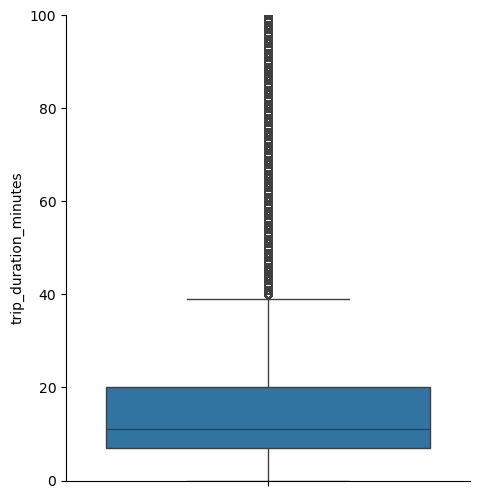

In [73]:
# plt.boxplot(bikes3["trip_duration_minutes"])
sns.catplot(data=bikes3,kind="box", y="trip_duration_minutes").set(ylim=(0,100))

In [80]:
#1 Create salary labels
duration_labels = ["short_duration", "medium_duration", "long_duration", "extra_long_duration"]

#2 Create the salary ranges list
duration_ranges = [0, 15, 30, 45, np.inf]

#3 Create salary_level
bikes3["trip_type"] = pd.cut(bikes3["trip_duration_minutes"],
                                  bins= duration_ranges,
                                  labels=duration_labels)

bikes3[["trip_type", "trip_duration_minutes"]]

bikes3["trip_type"].value_counts()

trip_type
short_duration         6767279
medium_duration        2425111
extra_long_duration     729120
long_duration           665323
Name: count, dtype: int64

In [ ]:
# make trip_type categorical and assign it an order
bikes3['trip_type'] = pd.Categorical(bikes3['trip_type'],
categories=['short_duration', 'medium_duration', 'long_duration', "extra_long_duration"])

In [82]:
bikes3.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_lat,...,end_lat,end_lng,start_time,end_time,start_hour,end_hour,trip_duration_minutes,time_of_day,z_score,trip_type
0,1,classic_bike,2021-01-01 00:08:33,2021-01-01 00:33:53,Maine Ave & 9th St SW,31646,Rosslyn Metro / Wilson Blvd & Ft Myer Dr,31015,member,38.880440,...,38.894600,-77.072305,00:08:33,00:33:53,0,0,25.0,night,0.011684,medium_duration
1,2,electric_bike,2021-01-01 00:13:43,2021-01-01 00:29:34,10th & U St NW,31111,NaN,31515,casual,38.917193,...,38.960000,-77.020000,00:13:43,00:29:34,0,0,16.0,night,-0.038632,medium_duration
2,3,electric_bike,2021-01-01 00:14:32,2021-01-01 00:28:45,17th & Corcoran St NW,31214,14th & Belmont St NW,31119,member,38.912138,...,38.920870,-77.031691,00:14:32,00:28:45,0,0,14.0,night,-0.049814,short_duration
3,4,classic_bike,2021-01-01 00:15:45,2021-01-01 00:21:20,Wilson Blvd. & N. Vermont St.,31926,Wilson Blvd. & N. Vermont St.,31926,member,38.879477,...,38.879477,-77.114563,00:15:45,00:21:20,0,0,6.0,night,-0.094540,short_duration
4,5,classic_bike,2021-01-01 00:17:46,2021-01-01 00:21:00,11th & Park Rd NW,31651,14th & Newton St NW,31649,member,38.931322,...,38.931991,-77.032956,00:17:46,00:21:00,0,0,3.0,night,-0.111312,short_duration


Which hours has the highest frequency of usage?

In [85]:
trip_duration_value_counts = bikes3["start_hour"].value_counts()
peak_time = trip_duration_value_counts.idxmax()

In [86]:
peak_time

np.int32(17)

In [90]:
# daily trends
# what types of trip are most popular in the different times of day?
bikes3.groupby("time_of_day")["trip_type"].value_counts()


time_of_day  trip_type          
afternoon    short_duration         2074869
             medium_duration         845310
             extra_long_duration     328781
             long_duration           276817
evening      short_duration         2265592
             medium_duration         823980
             long_duration           209223
             extra_long_duration     207602
morning      short_duration         1908460
             medium_duration         590845
             extra_long_duration     157936
             long_duration           142269
night        short_duration          518358
             medium_duration         164976
             long_duration            37014
             extra_long_duration      34801
Name: count, dtype: int64

does the duration of the trip influence the rideable type ?

In [91]:
bikes3["rideable_type"].value_counts()

rideable_type
classic_bike     7710232
electric_bike    2443713
docked_bike       539470
Name: count, dtype: int64

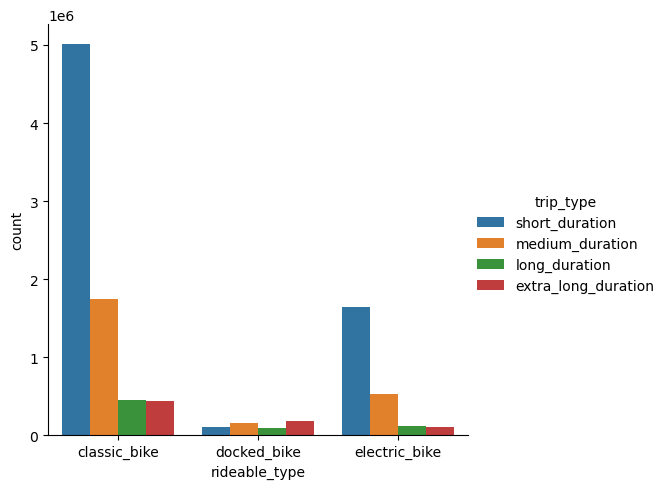

In [94]:
sns.catplot(data=bikes3, kind="count", x = "rideable_type", hue= "trip_type")

In [104]:
# busiest destinations
# which stations are busiest at the different times of day?

morning_time = bikes3[bikes3["time_of_day"]=="morning"]
morning_time_value_counts=morning_time["start_station_id"].value_counts()
busiest_station_morning= morning_time_value_counts.idxmax()
print(f"busiest morning station: {busiest_station_morning}")

afternoon_time = bikes3[bikes3["time_of_day"]=="afternoon"]
afternoon_time_value_counts=afternoon_time["start_station_id"].value_counts()
busiest_station_afternoon= afternoon_time_value_counts.idxmax()
print(f"busiest afternoon station: {busiest_station_afternoon}")

evening_time = bikes3[bikes3["time_of_day"]=="evening"]
evening_time_value_counts=evening_time["start_station_id"].value_counts()
busiest_station_evening= evening_time_value_counts.idxmax()
print(f"busiest evening station: {busiest_station_evening}")

night_time = bikes3[bikes3["time_of_day"]=="night"]
night_time_value_counts=night_time["start_station_id"].value_counts()
busiest_station_night= night_time_value_counts.idxmax()
print(f"busiest night station: {busiest_station_night}")

busiest morning station: 31229
busiest afternoon station: 31229
busiest evening station: 31229
busiest night station: 31229


In [105]:
bikes3[bikes3["start_station_id"]=="31229"]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_lat,...,end_lat,end_lng,start_time,end_time,start_hour,end_hour,trip_duration_minutes,time_of_day,z_score,trip_type
5,6,electric_bike,2021-01-01 00:18:16,2021-01-01 00:29:05,NaN,31229,Georgia Ave & Kennedy St NW,31415,casual,38.930000,...,38.956738,-77.027940,00:18:16,00:29:05,0,0,11.0,night,-0.066586,short_duration
52,53,electric_bike,2021-01-01 01:02:51,2021-01-01 01:16:53,NaN,31229,Connecticut & Nebraska Ave NW,31310,member,38.910000,...,38.954972,-77.069952,01:02:51,01:16:53,1,1,14.0,night,-0.049814,short_duration
68,69,electric_bike,2021-01-01 01:16:05,2021-01-01 01:16:20,NaN,31229,NaN,31229,casual,38.920000,...,38.920000,-77.030000,01:16:05,01:16:20,1,1,0.0,night,-0.128084,NaN
70,71,electric_bike,2021-01-01 01:16:41,2021-01-01 01:25:02,NaN,31229,NaN,31623,casual,38.920000,...,38.900000,-77.050000,01:16:41,01:25:02,1,1,8.0,night,-0.083358,short_duration
82,83,electric_bike,2021-01-01 01:36:07,2021-01-01 02:01:25,NaN,31229,NaN,31515,casual,38.910000,...,38.970000,-77.030000,01:36:07,02:01:25,1,2,25.0,night,0.011684,medium_duration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10693955,10693956,electric_bike,2023-12-31 23:43:05,2023-12-31 23:46:24,NaN,31229,NaN,31229,casual,38.940000,...,38.940000,-77.020000,23:43:05,23:46:24,23,23,3.0,night,-0.111312,short_duration
10693965,10693966,electric_bike,2023-12-31 23:46:57,2024-01-01 00:03:20,NaN,31229,14th St & Spring Rd NW,31401,member,38.910000,...,38.937500,-77.032800,23:46:57,00:03:20,23,0,16.0,night,-0.038632,medium_duration
10693974,10693975,electric_bike,2023-12-31 23:50:12,2023-12-31 23:53:09,NaN,31229,Adams Mill & Columbia Rd NW,31104,member,38.930000,...,38.922849,-77.042525,23:50:12,23:53:09,23,23,3.0,night,-0.111312,short_duration
10693975,10693976,electric_bike,2023-12-31 23:50:30,2023-12-31 23:56:00,New Hampshire Ave & T St NW,31229,16th & Irving St NW,31122,member,38.915561,...,38.928893,-77.036250,23:50:30,23:56:00,23,23,6.0,night,-0.094540,short_duration


In [108]:
evening_time = bikes3[bikes3["time_of_day"]=="evening"]
evening_time_value_counts=evening_time["start_station_id"].value_counts()
evening_time_value_counts
# busiest_station_evening= evening_time_value_counts.idxmax()
# print(f"busiest evening station: {busiest_station_evening}")

start_station_id
31229          112777
31623           82391
31613           51166
31201           35409
31603           31508
                ...  
32283               2
MTL-ECO5-03         1
32277               1
31389               1
31398               1
Name: count, Length: 767, dtype: int64

In [ ]:
sample = bikes3[bikes3["start_station_id"]=="31229"].sample(n=20, axis=0)
sample

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,start_lat,...,end_lat,end_lng,start_time,end_time,start_hour,end_hour,trip_duration_minutes,time_of_day,z_score,trip_type
673500,673501,electric_bike,2021-05-15 00:52:59,2021-05-15 00:53:54,NaN,31229,NaN,31229,member,38.920000,...,38.920000,-77.020000,00:52:59,00:53:54,0,0,1.0,night,-0.122493,short_duration
7485545,7485546,docked_bike,2023-05-13 13:36:08,2023-05-13 13:52:40,New Hampshire Ave & T St NW,31229,Reservoir Rd & 38th St NW,31325,casual,38.915544,...,38.912614,-77.074323,13:36:08,13:52:40,13,13,17.0,afternoon,-0.033042,medium_duration
540067,540068,electric_bike,2021-04-27 13:38:06,2021-04-27 13:52:41,NaN,31229,Lamont & Mt Pleasant NW,31107,casual,38.910000,...,38.931880,-77.038740,13:38:06,13:52:41,13,13,15.0,afternoon,-0.044223,short_duration
9462671,9462672,electric_bike,2023-09-23 18:49:31,2023-09-23 19:51:50,NaN,31229,NaN,31229,member,38.920000,...,38.920000,-77.020000,18:49:31,19:51:50,18,19,62.0,evening,0.218540,extra_long_duration
17911,17912,classic_bike,2021-01-07 09:40:45,2021-01-07 09:46:52,New Hampshire Ave & T St NW,31229,18th & M St NW,31221,member,38.915544,...,38.905067,-77.041779,09:40:45,09:46:52,9,9,6.0,morning,-0.094540,short_duration
4388922,4388923,electric_bike,2022-07-07 14:50:38,2022-07-07 15:08:15,NaN,31229,Union Market,31517,casual,38.930000,...,38.907908,-76.997070,14:50:38,15:08:15,14,15,18.0,afternoon,-0.027451,medium_duration
1542552,1542553,electric_bike,2021-08-16 12:10:12,2021-08-16 12:15:08,NaN,31229,NaN,31229,member,38.930000,...,38.920000,-77.030000,12:10:12,12:15:08,12,12,5.0,afternoon,-0.100130,short_duration
9087179,9087180,electric_bike,2023-08-30 10:15:20,2023-08-30 10:18:22,NaN,31229,NaN,31229,member,38.920000,...,38.920000,-77.040000,10:15:20,10:18:22,10,10,3.0,morning,-0.111312,short_duration
4824417,4824418,classic_bike,2022-08-12 09:33:32,2022-08-12 09:50:51,New Hampshire Ave & T St NW,31229,New Jersey Ave & F St NW,31655,casual,38.915544,...,38.897108,-77.011616,09:33:32,09:50:51,9,9,17.0,morning,-0.033042,medium_duration
2446346,2446347,electric_bike,2021-11-14 11:40:48,2021-11-14 11:54:12,NaN,31229,NaN,31623,member,38.920000,...,38.900000,-77.020000,11:40:48,11:54:12,11,11,13.0,morning,-0.055405,short_duration


In [ ]:
top_stations = bikes3["start_station_id"].value_counts()
top50_stations_list = top_stations.head(50).index
top50_stations_list= list(top50_stations_list)

In [ ]:
# check when is each station the busiest
top50_stations = bikes3[bikes3["start_station_id"].isin(top50_stations_list)]
top50_value_counts = top50_stations.groupby("start_station_id")["time_of_day"].value_counts(sort=False)
top50_value_counts.head(50)
# = bikes3.groupby("start_station_id")["time_of_day"].value_counts()
#TODO - check per station which is the busiest time



start_station_id  time_of_day
31101             morning        24804
                  afternoon      22925
                  evening        23196
                  night           7554
31104             morning        14249
                  afternoon      15693
                  evening        20044
                  night           7844
31108             morning        19308
                  afternoon      19116
                  evening        17561
                  night           2710
31114             morning        14294
                  afternoon      14310
                  evening        19400
                  night          10715
31116             morning        16084
                  afternoon      12540
                  evening        17154
                  night           6040
31119             morning        14582
                  afternoon      10577
                  evening        16569
                  night           4484
31124             morning        1

Top 5 grid cells by number of rows:
grid_cell
19457_-38520    104782
19448_-38503    102824
19444_-38525    101207
19454_-38518     97767
19444_-38517     89363
Name: count, dtype: int64


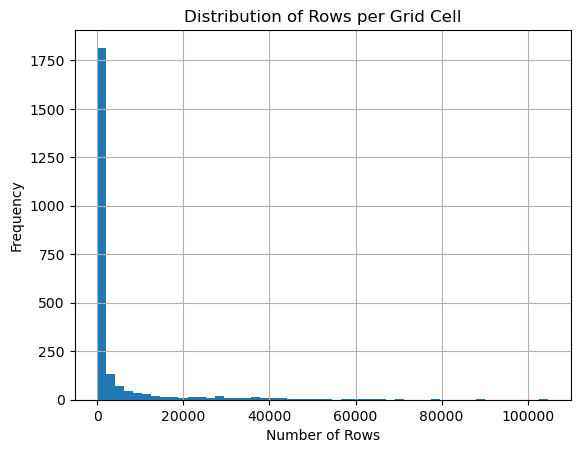

In [144]:
grid_counts = bikes2["grid_cell"].value_counts()

print("Top 5 grid cells by number of rows:")
print(grid_counts.head())

# Histogram of grid cell sizes
grid_counts.hist(bins=50)
plt.title("Distribution of Rows per Grid Cell")
plt.xlabel("Number of Rows")
plt.ylabel("Frequency")
plt.show()

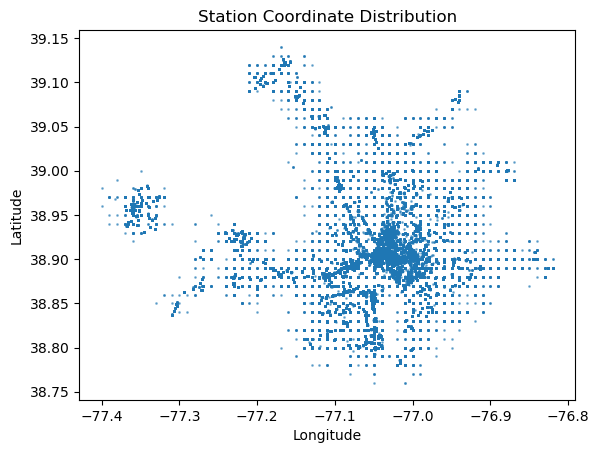

In [145]:
plt.scatter(bikes2["start_lng"], bikes2["start_lat"], s=1, alpha=0.5)
plt.title("Station Coordinate Distribution")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

2. Strategies to Handle the Skew
Option 1: Adaptive Grid Sizes
Use smaller grid sizes in densely populated areas and larger sizes in sparse areas:

Identify Dense Areas: Determine grid cells with counts above a certain threshold.
Subdivide Dense Cells: Use a smaller grid size for those specific cells.

In [ ]:
# # Define a threshold for dense cells
# dense_threshold = grid_counts.quantile(0.95)  # Top 5% of grid cells

# # Identify dense grid cells
# dense_cells = grid_counts[grid_counts > dense_threshold].index

# # Flag rows in dense cells
# bikes2["is_dense"] = bikes2["grid_cell"].isin(dense_cells)

# # Subdivide dense cells with a smaller grid size
# dense_grid_size = chosen_grid_size / 2
# bikes2.loc[bikes2["is_dense"], "sub_grid_cell"] = (
#     (bikes2["start_lat"] // dense_grid_size).astype(int).astype(str) + "_" +
#     (bikes2["start_lng"] // dense_grid_size).astype(int).astype(str)
# )

# # Use the refined grid cell where applicable
# bikes2["final_grid_cell"] = bikes2["sub_grid_cell"].fillna(bikes2["grid_cell"])